In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/HR%20Data%20for%20Analytics/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
sales_salary = pd.crosstab(df['sales'], df['salary'], normalize=False)
sales_salary = sales_salary[['low', 'medium', 'high']]
sales_salary['temp'] = sales_salary.index.values
sales_salary.iloc[0, 3] = 'it'
sales_salary.iloc[1, 3] = 'rand_d'
sales_salary.sort_values(by='temp', inplace=True)
sales_salary.set_index('temp', inplace=True, )
sales_salary.index.name = 'sales'
sales_salary

salary,low,medium,high
sales,,,
accounting,358,335,74
hr,335,359,45
it,609,535,83
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
rand_d,364,372,51
sales,2099,1772,269
support,1146,942,141


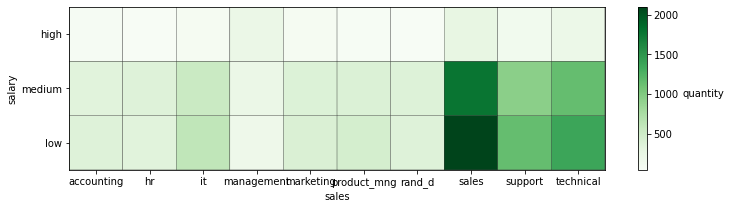

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.get_cmap('Greens')

fig, ax = plt.subplots(figsize=(12,3))
plot = ax.pcolor(sales_salary.T, cmap=colormap, edgecolor='black', )
ax.set_xlabel('sales')
ax.set_xticks(np.arange(len(sales_salary.index.values))+0.5)
ax.set_xticklabels(sales_salary.index.values)
ax.set_ylabel('salary')
ax.set_yticks(np.arange(len(sales_salary.columns.values))+0.5)
ax.set_yticklabels(sales_salary.columns.values)
cbar = fig.colorbar(plot)
cbar.ax.set_ylabel('quantity', rotation=360)
cbar.ax.get_yaxis().labelpad = 25

In [4]:
df = df.join(pd.get_dummies(df['salary']), )
df = df.join(pd.get_dummies(df['sales']), rsuffix='d') 
df.drop(labels=['sales', 'salary'], inplace=True, axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,salesd,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df["left"].describe()

In [6]:
y = df['left']
df.drop(labels='left', axis=1, inplace=True)
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(df, y, test_size=0.25)
xtr.shape, xte.shape, ytr.shape, yte.shape, 

((11249, 20), (3750, 20), (11249,), (3750,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score

lr = LogisticRegression()
lr.fit(xtr, ytr)
precision_score(ytr, lr.predict(xtr))

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.612635609444799

In [8]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV()
lr_cv.fit(xtr, ytr)
precision_score(ytr, lr_cv.predict(xtr))

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

0.6140575079872205

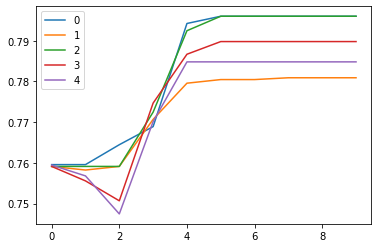

In [9]:
pd.DataFrame(lr_cv.scores_[1]).T.plot()

In [10]:
from sklearn.metrics import classification_report

print(classification_report(yte, lr_cv.predict(xte)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2887
           1       0.57      0.33      0.42       863

    accuracy                           0.79      3750
   macro avg       0.70      0.63      0.65      3750
weighted avg       0.76      0.79      0.77      3750



In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtr, ytr)
print(precision_score(ytr, rf.predict(xtr)))
print(classification_report(yte, rf.predict(xte)))

1.0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2887
           1       0.99      0.97      0.98       863

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750



In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly.fit(df)

xtr2 = poly.transform(xtr)

lr_cv2 = LogisticRegression()
lr_cv2.fit(xtr2, ytr)

xte2 = poly.transform(xte)

print(precision_score(ytr, lr_cv2.predict(xtr2)))
print(classification_report(yte, lr_cv2.predict(xte2)))

0.6056458511548332
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2887
           1       0.59      0.25      0.35       863

    accuracy                           0.79      3750
   macro avg       0.70      0.60      0.61      3750
weighted avg       0.76      0.79      0.75      3750



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.31356372 0.13133818 0.17839561 0.14744138 0.17995432 0.01055236
 0.00160673 0.00527756 0.00710331 0.00354698 0.00177    0.00137697
 0.00208006 0.00158083 0.00182801 0.00115169 0.00126246 0.00345535
 0.00316241 0.00355207]


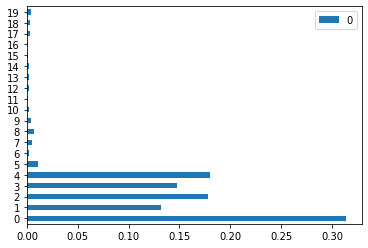

In [13]:
print(rf.feature_importances_)
pd.DataFrame(rf.feature_importances_).plot(kind='barh')